In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [2]:
TRAIN_DIR = r"C:\Users\visha\OneDrive\Desktop\epics\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
VALID_DIR = r"C:\Users\visha\OneDrive\Desktop\epics\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"
TEST_DIR = r"C:\Users\visha\OneDrive\Desktop\epics\archive\test"

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(TRAIN_DIR, transform=transform)
valid_dataset = datasets.ImageFolder(VALID_DIR, transform=transform)
test_dataset = datasets.ImageFolder(TEST_DIR, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)
print("Classes:", num_classes)

Classes: 38


In [3]:
class PlantCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1), nn.ReLU(),
            nn.Conv2d(32,32,3), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32,64,3,padding=1), nn.ReLU(),
            nn.Conv2d(64,64,3), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64,128,3,padding=1), nn.ReLU(),
            nn.Conv2d(128,128,3), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128,256,3,padding=1), nn.ReLU(),
            nn.Conv2d(256,256,3), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256,512,3,padding=1), nn.ReLU(),
            nn.Conv2d(512,512,3), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Dropout(0.25)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*2*2,1500),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1500,num_classes)
        )

    def forward(self,x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = PlantCNN(num_classes).to(device)


In [4]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)

Epoch 1/10 - Validation: 100%|██████████| 550/550 [00:15<00:00, 36.50it/s]


✅ Best model updated

Epoch [1/10] | Train Loss: 2.5522 | Train Acc: 0.2775 | Val Acc: 0.5735 | Test Acc: 0.0000



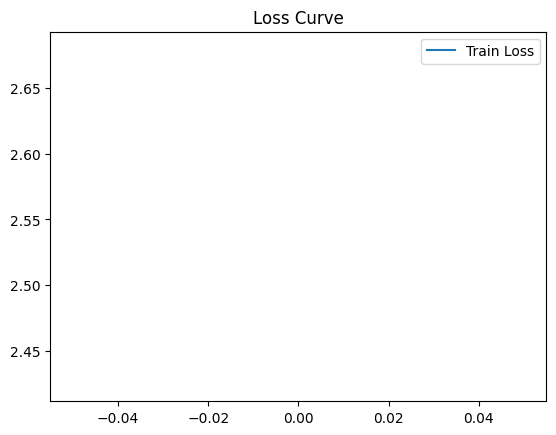

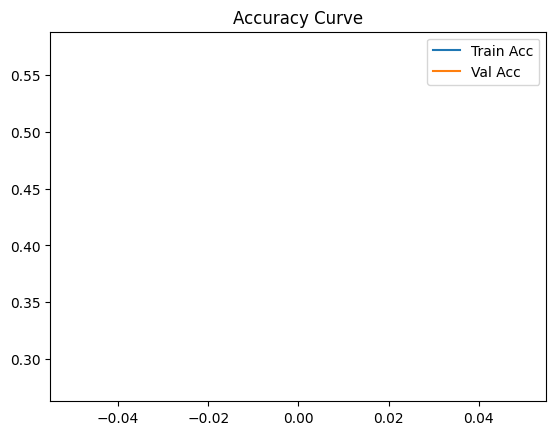

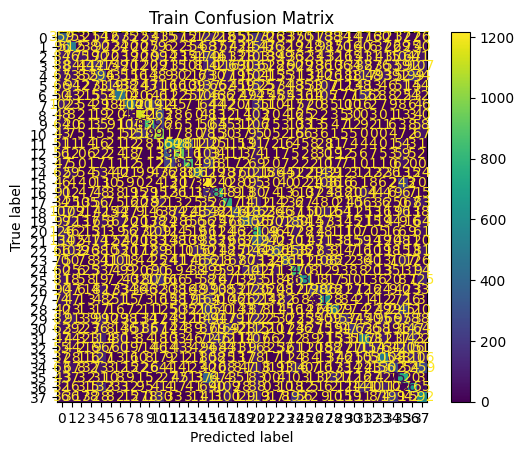

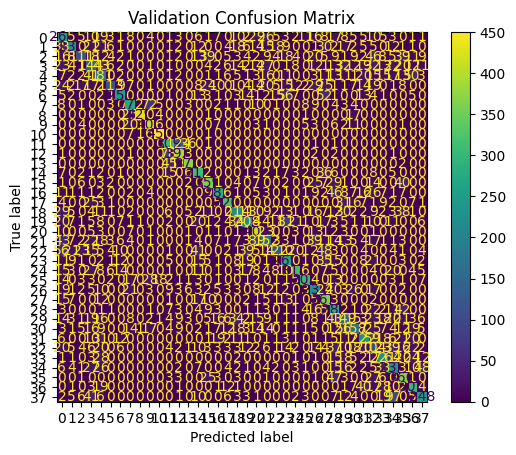

Epoch 2/10 - Validation: 100%|██████████| 550/550 [00:15<00:00, 36.57it/s]


✅ Best model updated

Epoch [2/10] | Train Loss: 1.1317 | Train Acc: 0.6464 | Val Acc: 0.7698 | Test Acc: 0.0606



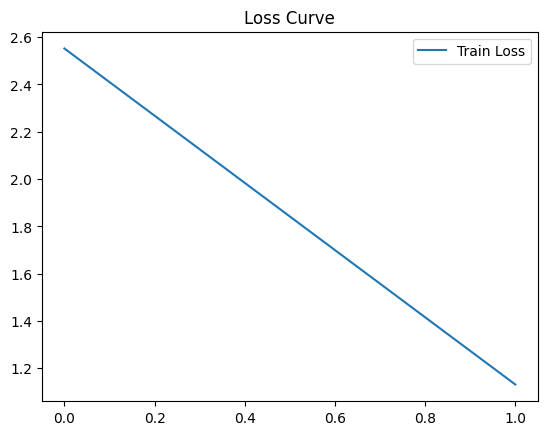

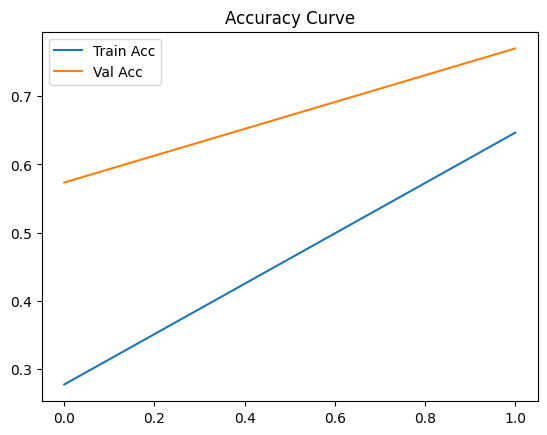

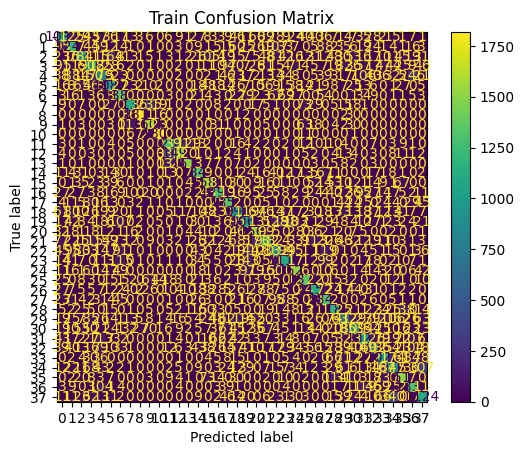

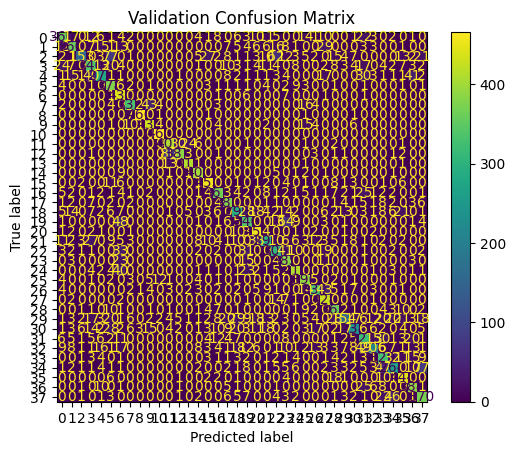

Epoch 3/10 - Validation: 100%|██████████| 550/550 [00:15<00:00, 35.83it/s]


✅ Best model updated

Epoch [3/10] | Train Loss: 0.7113 | Train Acc: 0.7707 | Val Acc: 0.8267 | Test Acc: 0.0303



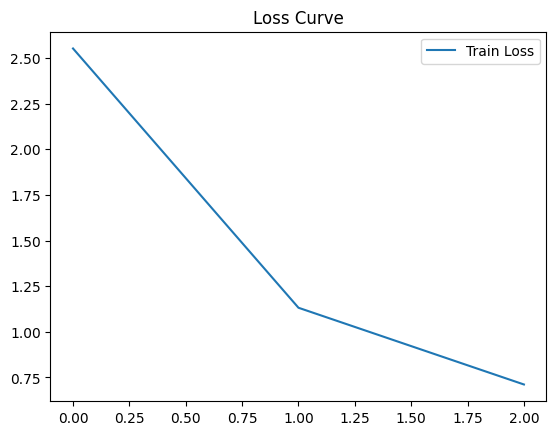

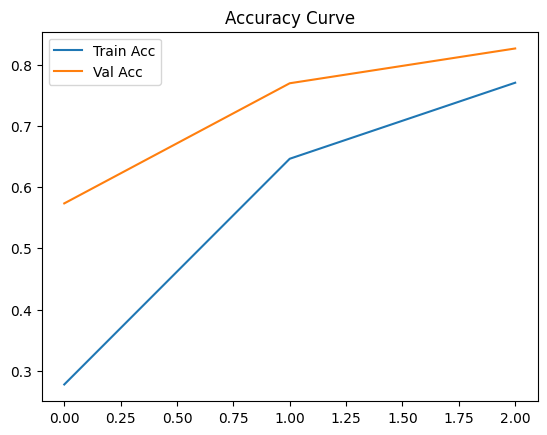

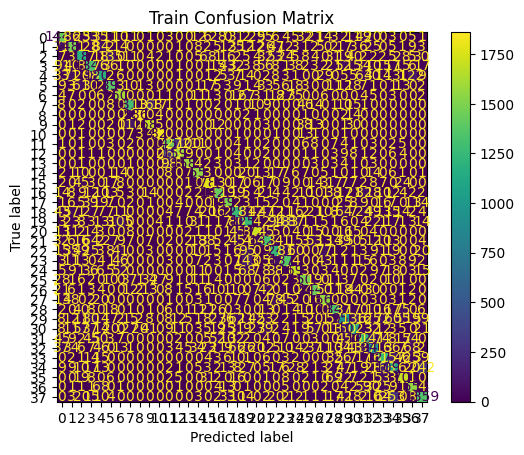

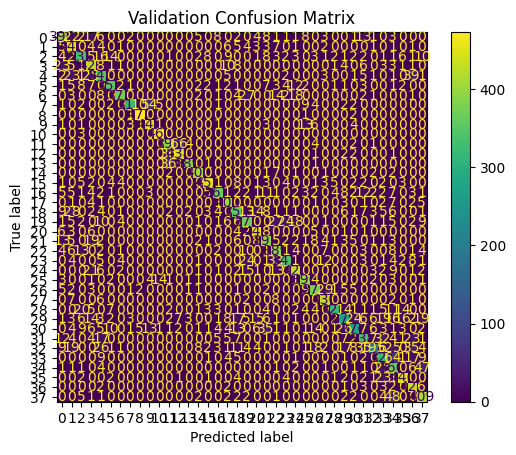

Epoch 4/10 - Validation: 100%|██████████| 550/550 [00:15<00:00, 35.76it/s]


✅ Best model updated

Epoch [4/10] | Train Loss: 0.5286 | Train Acc: 0.8270 | Val Acc: 0.8585 | Test Acc: 0.0303



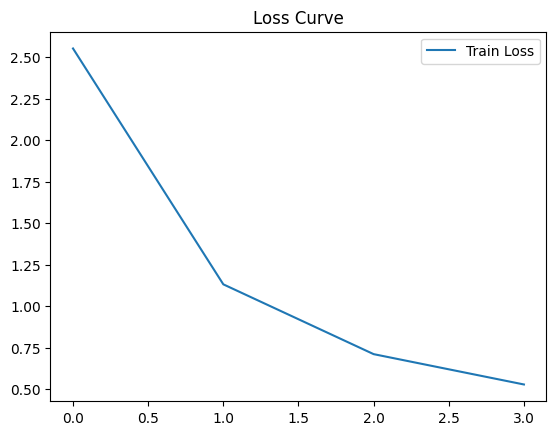

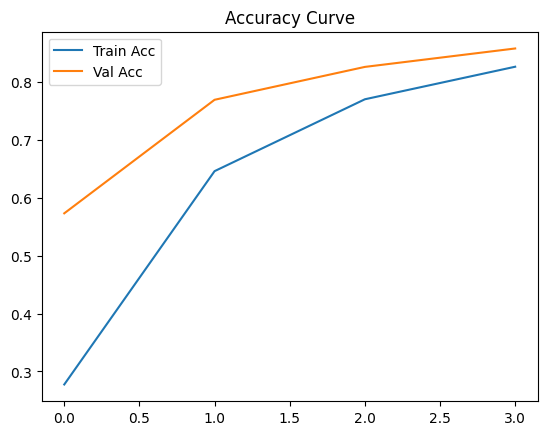

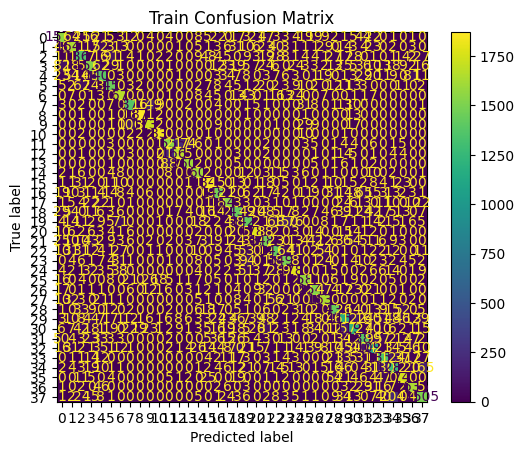

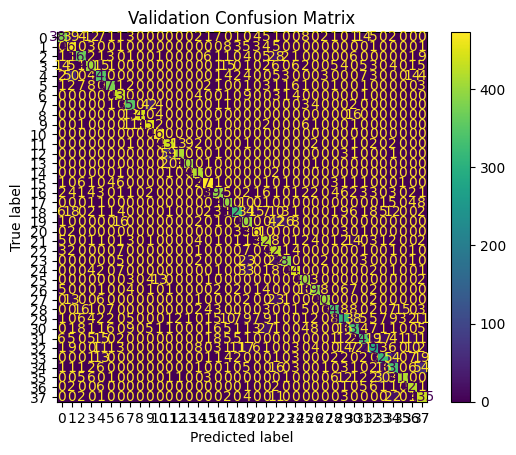

Epoch 5/10 - Validation: 100%|██████████| 550/550 [00:15<00:00, 36.42it/s]


✅ Best model updated

Epoch [5/10] | Train Loss: 0.4191 | Train Acc: 0.8607 | Val Acc: 0.8959 | Test Acc: 0.0606



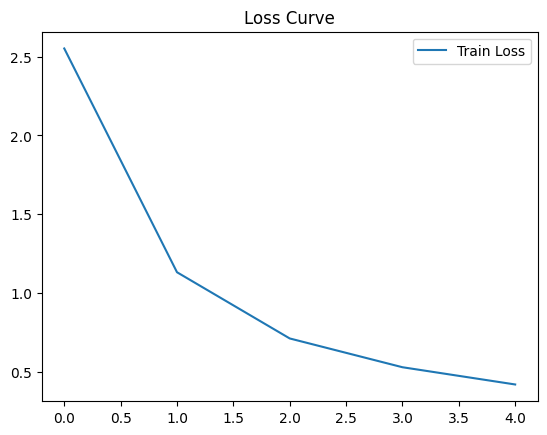

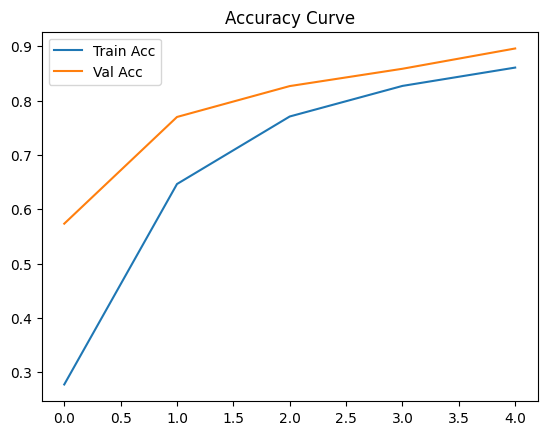

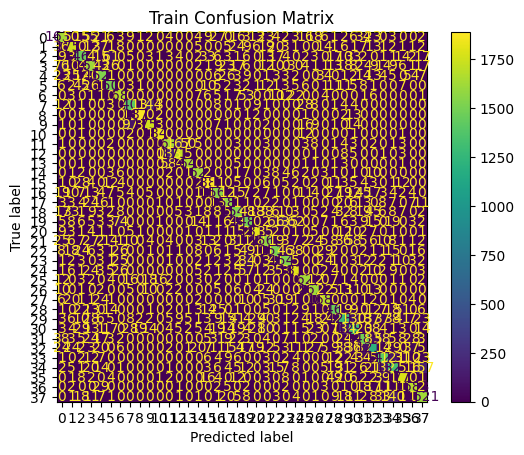

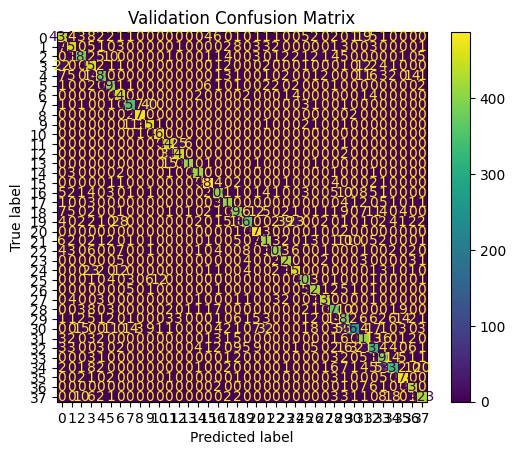

Epoch 6/10 - Validation: 100%|██████████| 550/550 [00:14<00:00, 36.81it/s]


✅ Best model updated

Epoch [6/10] | Train Loss: 0.3399 | Train Acc: 0.8872 | Val Acc: 0.9034 | Test Acc: 0.0606



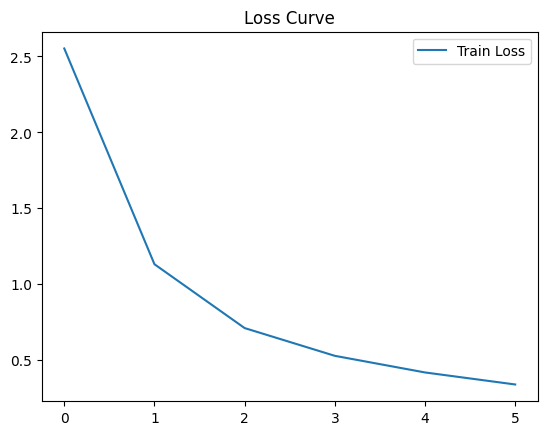

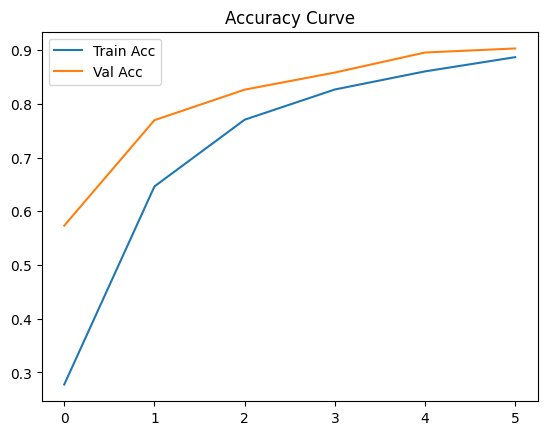

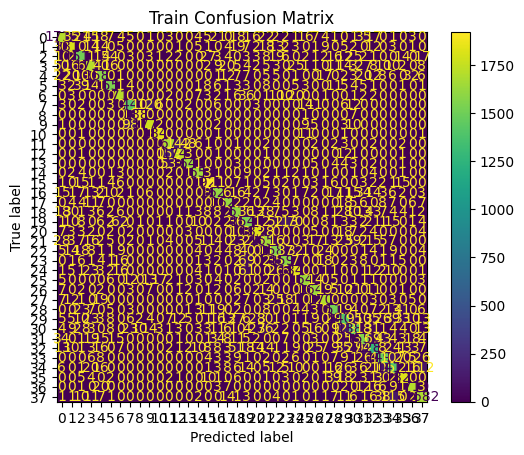

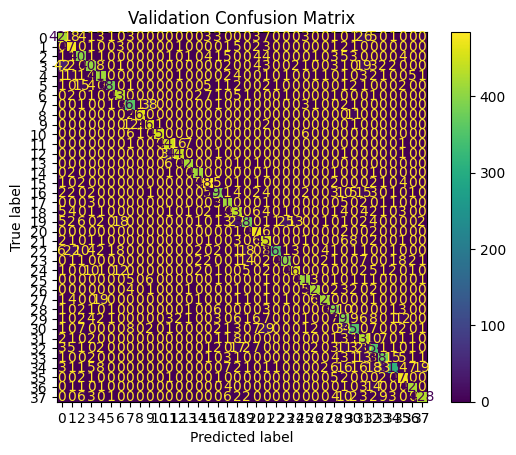

Epoch 7/10 - Validation: 100%|██████████| 550/550 [00:18<00:00, 29.94it/s]


✅ Best model updated

Epoch [7/10] | Train Loss: 0.2805 | Train Acc: 0.9062 | Val Acc: 0.9112 | Test Acc: 0.0606



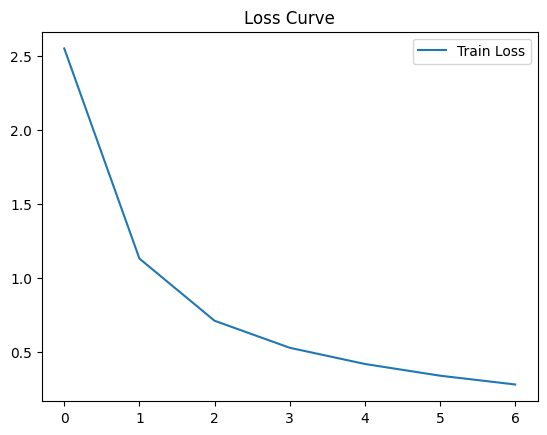

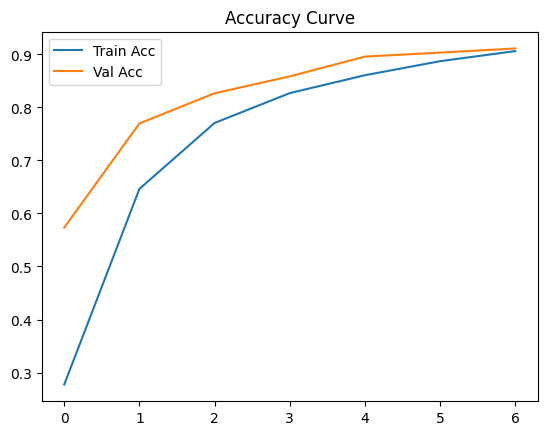

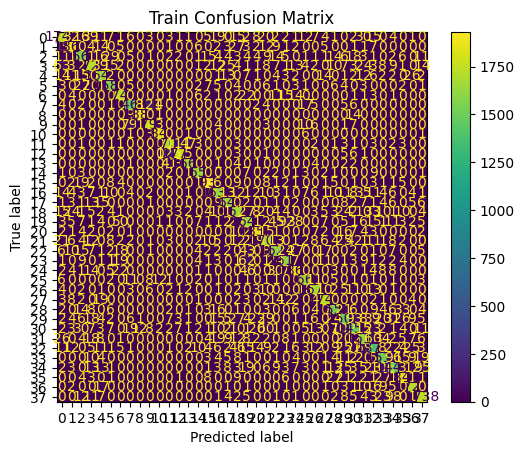

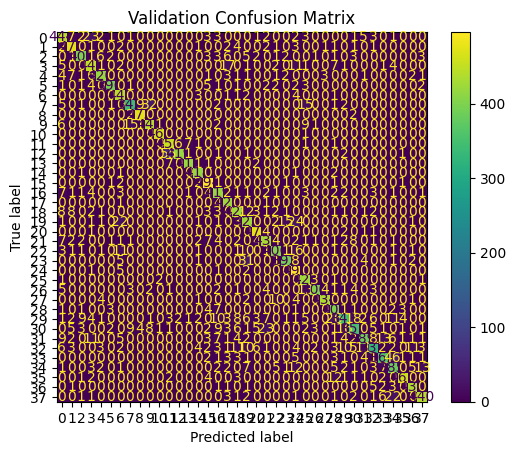

Epoch 8/10 - Validation: 100%|██████████| 550/550 [00:15<00:00, 35.62it/s]


✅ Best model updated

Epoch [8/10] | Train Loss: 0.2399 | Train Acc: 0.9199 | Val Acc: 0.9180 | Test Acc: 0.0606



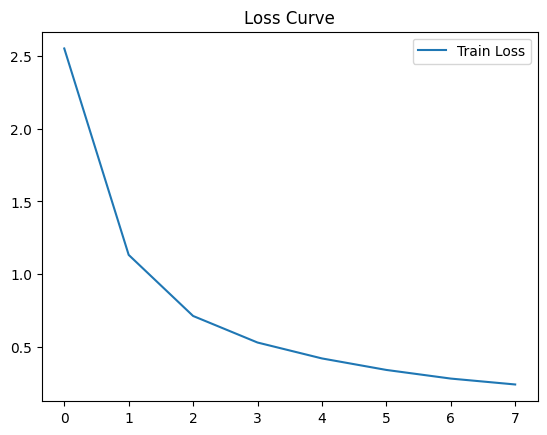

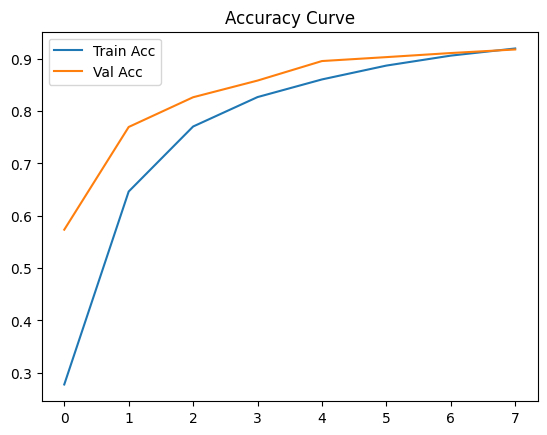

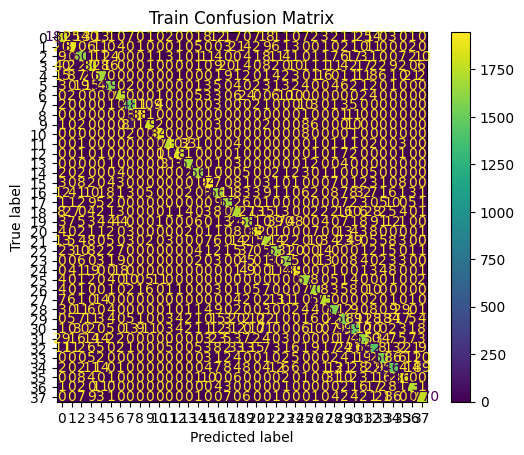

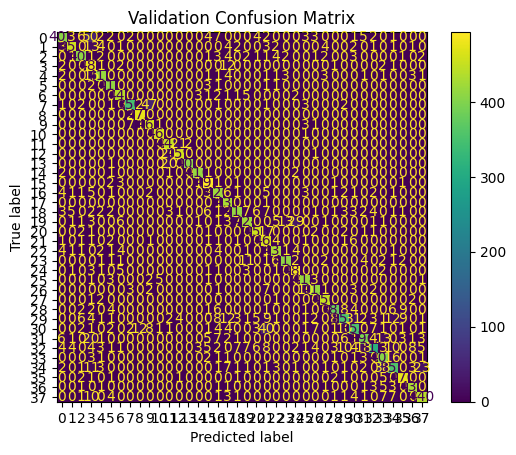

Epoch 9/10 - Validation: 100%|██████████| 550/550 [00:17<00:00, 31.79it/s]


✅ Best model updated

Epoch [9/10] | Train Loss: 0.2008 | Train Acc: 0.9324 | Val Acc: 0.9355 | Test Acc: 0.0606



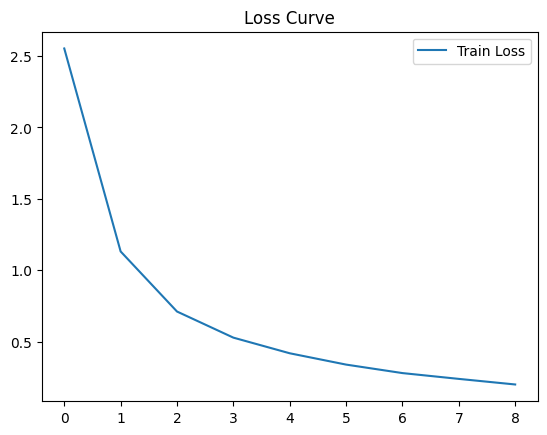

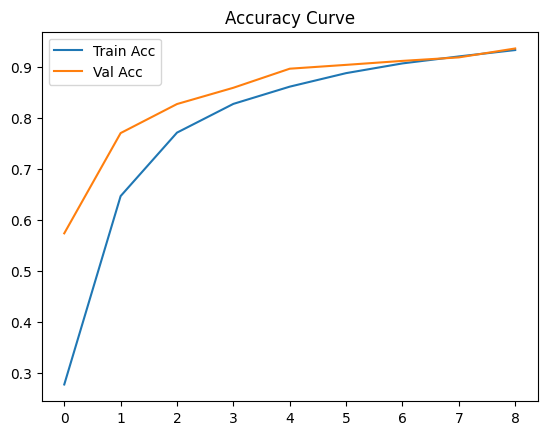

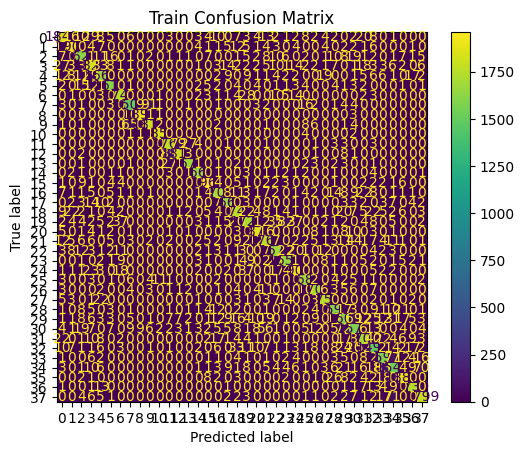

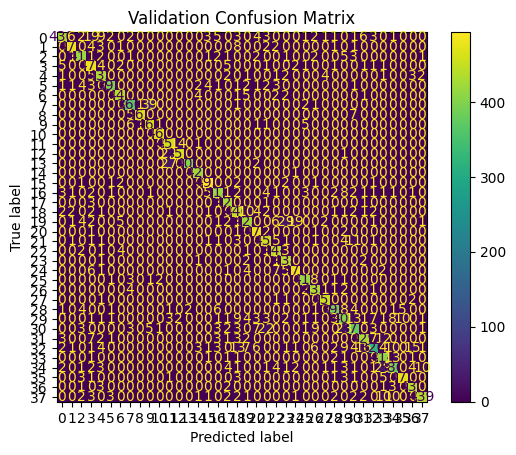

Epoch 10/10 - Validation: 100%|██████████| 550/550 [00:17<00:00, 32.14it/s]


EarlyStopping Counter: 1/3

Epoch [10/10] | Train Loss: 0.1771 | Train Acc: 0.9405 | Val Acc: 0.9257 | Test Acc: 0.0606



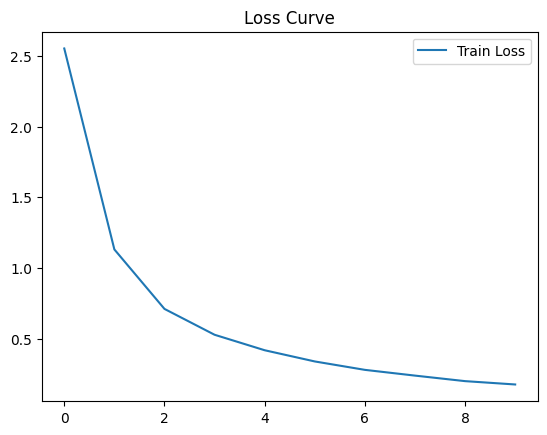

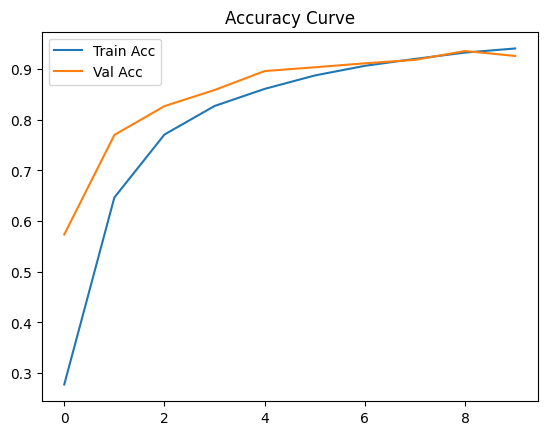

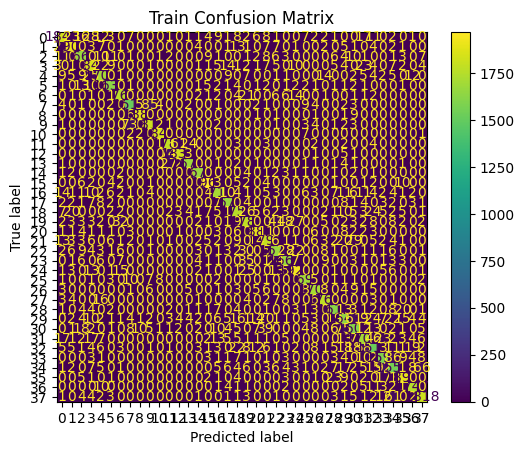

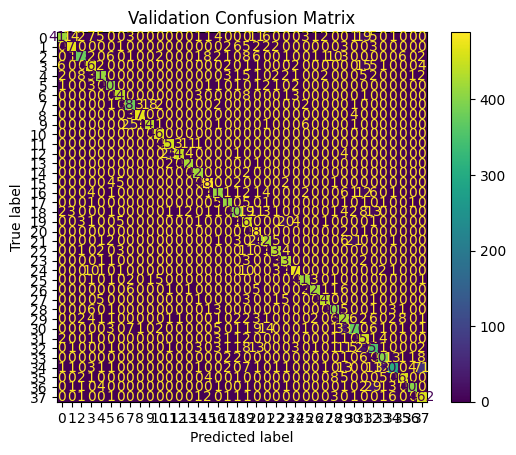

In [5]:
# ================= REQUIRED VARIABLES (FIX ERRORS) =================

best_val_acc = 0.0
patience = 3              # early stopping patience
trigger_times = 0

train_losses = []
train_accs = []
val_accs = []

BEST_MODEL_PATH = r"C:\Users\visha\OneDrive\Desktop\epics\archive\best_model.pth"

EPOCHS = 10

for epoch in range(EPOCHS):

    # ================= TRAIN =================
    model.train()
    train_correct = 0
    train_total = 0
    running_loss = 0

    all_train_preds = []
    all_train_labels = []

    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Training")

    for images, labels in train_bar:

        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs,1)

        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        all_train_preds.extend(predicted.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

        train_bar.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader)
    train_acc = train_correct / train_total

    # ================= VALIDATION =================
    model.eval()
    val_correct = 0
    val_total = 0

    all_val_preds = []
    all_val_labels = []

    val_bar = tqdm(valid_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Validation")

    with torch.no_grad():
        for images, labels in val_bar:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs,1)

            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            all_val_preds.extend(predicted.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    val_acc = val_correct / val_total

    # ================= TEST =================
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs,1)

            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_acc = test_correct / test_total

    # ================= SAVE BEST MODEL =================


    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print("✅ Best model updated")
        trigger_times = 0
    else:
        trigger_times += 1
        print(f"EarlyStopping Counter: {trigger_times}/{patience}")

    # ================= EARLY STOP =================
    if trigger_times >= patience:
        print("⛔ Early stopping triggered")
        break

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"\nEpoch [{epoch+1}/{EPOCHS}] | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}\n")

    # ================= PLOTS =================
    plt.figure()
    plt.plot(train_losses,label="Train Loss")
    plt.legend()
    plt.title("Loss Curve")
    plt.show()

    plt.figure()
    plt.plot(train_accs,label="Train Acc")
    plt.plot(val_accs,label="Val Acc")
    plt.legend()
    plt.title("Accuracy Curve")
    plt.show()

    # ================= CONFUSION MATRIX =================
    cm_train = confusion_matrix(all_train_labels, all_train_preds)
    disp_train = ConfusionMatrixDisplay(cm_train)
    disp_train.plot()
    plt.title("Train Confusion Matrix")
    plt.show()

    cm_val = confusion_matrix(all_val_labels, all_val_preds)
    disp_val = ConfusionMatrixDisplay(cm_val)
    disp_val.plot()
    plt.title("Validation Confusion Matrix")
    plt.show()
